# Context of Dataset:
https://www.kaggle.com/datasets/prepinstaprime/black-friday-sales-data




In [902]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import io

In [903]:
path = "/Users/jeremyvuong/Downloads/"

filename_read = os.path.join(path,'train.csv')
data = pd.read_csv(filename_read, na_values=['NaN','?'])
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 550068
Number of attributes = 12


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1005685,P00248142,M,26-35,17,A,0,1,5,NaN,NaN,5454
1,1003841,P00313742,M,46-50,18,A,4+,0,18,NaN,NaN,3786
2,1000631,P00173042,M,36-45,17,C,3,1,13,15.0,16.0,754
3,1004141,P00296042,M,36-45,17,B,2,0,8,13.0,16.0,8044
4,1003080,P00129842,M,26-35,20,A,4+,1,6,8.0,15.0,11996


# Handling Missing Values


In [904]:
data = data.replace('NaN',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
data.dtypes

Number of instances = 550068
Number of attributes = 12
Number of missing values:
	User_ID: 0
	Product_ID: 0
	Gender: 0
	Age: 0
	Occupation: 0
	City_Category: 0
	Stay_In_Current_City_Years: 0
	Marital_Status: 0
	Product_Category_1: 0
	Product_Category_2: 173638
	Product_Category_3: 383247
	Purchase: 0


User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# Two common approaches 


In [905]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))
data2

Number of rows in original data = 550068
Number of rows after discarding missing values = 166821


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
2,1000631,P00173042,M,36-45,17,C,3,1,13,15.0,16.0,754
3,1004141,P00296042,M,36-45,17,B,2,0,8,13.0,16.0,8044
4,1003080,P00129842,M,26-35,20,A,4+,1,6,8.0,15.0,11996
5,1002730,P00113342,M,36-45,11,C,1,1,1,8.0,17.0,15614
6,1002427,P00278942,F,26-35,14,C,3,0,1,2.0,3.0,19216
...,...,...,...,...,...,...,...,...,...,...,...,...
550053,1004509,P00002142,M,26-35,7,C,0,1,1,5.0,8.0,8238
550054,1000320,P00294442,M,36-45,6,C,4+,0,3,4.0,12.0,10903
550055,1005260,P00102342,M,36-45,7,A,1,1,8,14.0,17.0,7806
550057,1000173,P00267342,M,26-35,0,B,1,1,1,2.0,5.0,15630


## 


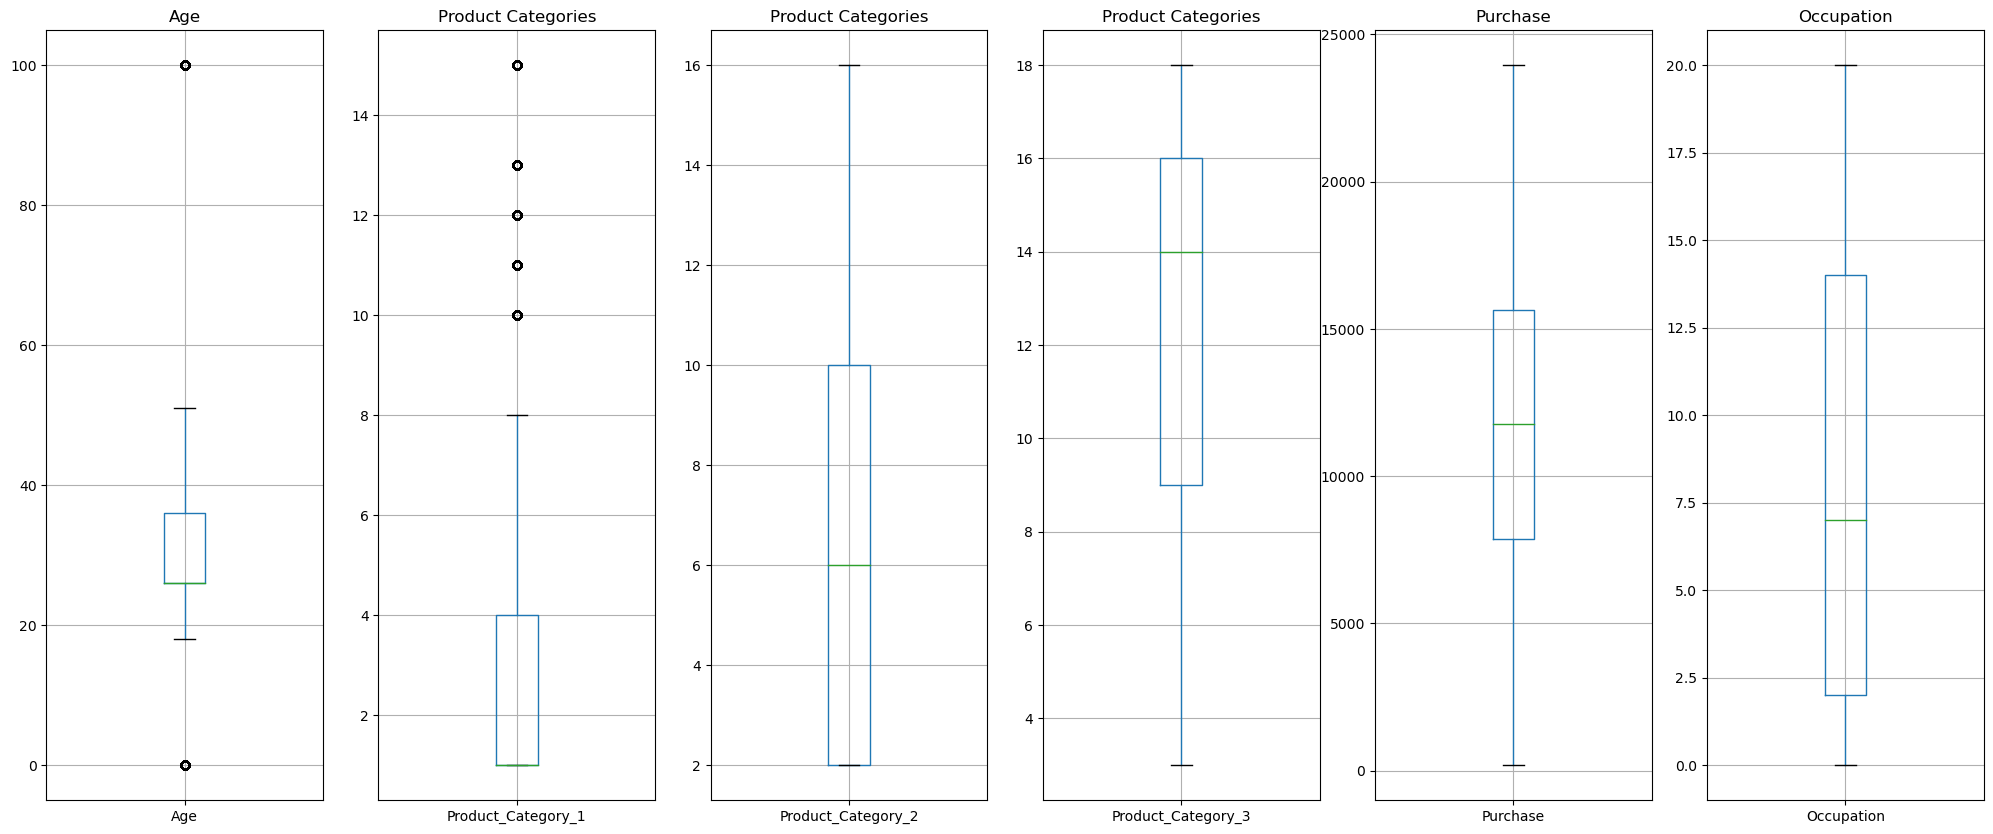

In [906]:
import matplotlib.pyplot as plt
data3 = data2.copy()

data3['Age'] = data2['Age'].apply(lambda x: int(x.split('-')[0]) if '-' in x else 100)
data3['Purchase'] = data2['Purchase']
data3['Occupation'] = data2['Occupation']
data3['Product_Category_1'] = data2['Product_Category_1']
data3['Product_Category_2'] = data2['Product_Category_2']
data3['Product_Category_3'] = data2['Product_Category_3']

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(25, 10))

data3.boxplot(column='Age', ax=axes[0])
axes[0].set_title('Age')

data3.boxplot(column='Product_Category_1', ax=axes[1])
axes[1].set_title('Product Categories')

data3.boxplot(column='Product_Category_2',ax=axes[2])
axes[2].set_title('Product Categories')

data3.boxplot(column='Product_Category_3',ax=axes[3])
axes[3].set_title('Product Categories')

data3.boxplot(column='Purchase', ax=axes[4])
axes[4].set_title('Purchase')

data3.boxplot(column='Occupation', ax=axes[5])
axes[5].set_title('Occupation')


plt.show()

### Finding Z-Scores

###  

In [907]:
Z = (data3-data3.mean())/data3.std()
Z[1:25]

/var/folders/3r/w56x09fx4rd6k8rpt74kdhmw0000gn/T/ipykernel_18428/2364751312.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Z = (data3-data3.mean())/data3.std()


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
3,0.259155,NaN,NaN,-0.821332,1.359705,2.042462,1.356164,0.807633,NaN,-0.711120,NaN,0.637053
4,-0.331497,NaN,NaN,1.217527,1.822131,1.265452,0.245124,0.565228,NaN,0.066483,NaN,0.024787
5,0.259155,NaN,NaN,1.217527,0.434852,-0.677073,0.245124,1.050037,NaN,0.778367,NaN,-0.177186
6,-0.331497,NaN,NaN,-0.821332,0.897278,-0.677073,-1.088124,-2.343625,NaN,1.487103,NaN,-0.352037
15,-0.331497,NaN,NaN,-0.821332,0.588994,0.488442,-0.421500,-1.131603,NaN,-1.751793,NaN,-0.885245
22,-0.804018,NaN,NaN,-0.821332,-0.644142,1.265452,0.689540,0.080419,NaN,1.773391,NaN,-0.199691
24,0.259155,NaN,NaN,1.217527,-0.181716,-0.677073,-1.088124,-0.889198,NaN,0.756526,NaN,-0.249319
30,4.039327,NaN,NaN,-0.821332,-0.181716,1.265452,0.245124,-0.646794,NaN,0.861204,NaN,0.453546
31,-0.331497,NaN,NaN,-0.821332,0.126568,0.099937,-0.643708,-1.858816,NaN,0.320306,NaN,-1.431725
33,-0.804018,NaN,NaN,-0.821332,-0.644142,-0.677073,-1.088124,-2.101220,NaN,-0.730009,NaN,0.180017


### 


In [908]:
from scipy import stats
print('Number of rows before discarding outliers = %d' % (data2.shape[0]))
data4 = data2[((np.abs(stats.zscore(data2.select_dtypes(exclude='object'))) > -3) & 
              (np.abs(stats.zscore(data2.select_dtypes(exclude='object'))) <= 3)).all(axis=1)]

print('Number of rows after discarding outliers = %d' % (data4.shape[0]))
data4

Number of rows before discarding outliers = 166821
Number of rows after discarding outliers = 163494


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
3,1004141,P00296042,M,36-45,17,B,2,0,8,13.0,16.0,8044
4,1003080,P00129842,M,26-35,20,A,4+,1,6,8.0,15.0,11996
5,1002730,P00113342,M,36-45,11,C,1,1,1,8.0,17.0,15614
6,1002427,P00278942,F,26-35,14,C,3,0,1,2.0,3.0,19216
15,1001503,P00003442,M,26-35,12,A,2,0,4,5.0,8.0,2755
...,...,...,...,...,...,...,...,...,...,...,...,...
550053,1004509,P00002142,M,26-35,7,C,0,1,1,5.0,8.0,8238
550054,1000320,P00294442,M,36-45,6,C,4+,0,3,4.0,12.0,10903
550055,1005260,P00102342,M,36-45,7,A,1,1,8,14.0,17.0,7806
550057,1000173,P00267342,M,26-35,0,B,1,1,1,2.0,5.0,15630


### Duplicate Data

In [909]:
dups = data4.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [910]:
print('Number of rows before discarding duplicates = %d' % (data4.shape[0]))
data4 = data4.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data4.shape[0]))

Number of rows before discarding duplicates = 163494
Number of rows after discarding duplicates = 163494


### Shuffling Dataframes

In [911]:
#np.random.seed(30) # Uncomment this line to get the same shuffle each time

data4 = data4.reindex(np.random.permutation(data4.index))
data4.reset_index(inplace=True, drop=True)
# use inplace=False
data4

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1005765,P00114942,M,26-35,11,B,2,1,1,15.0,16.0,15255
1,1001530,P00034742,M,26-35,4,A,1,1,5,14.0,17.0,6937
2,1003577,P00016342,F,55+,0,C,2,0,1,2.0,8.0,19642
3,1000509,P00025442,M,26-35,2,A,0,1,1,2.0,9.0,19049
4,1004919,P00110842,M,18-25,0,C,2,0,1,2.0,5.0,19037
...,...,...,...,...,...,...,...,...,...,...,...,...
163489,1003519,P00303442,F,26-35,14,A,1,1,1,8.0,14.0,7717
163490,1003476,P00190742,M,51-55,0,B,2,1,3,4.0,9.0,8407
163491,1004888,P00116842,F,55+,0,B,4+,0,2,5.0,8.0,13199
163492,1002887,P00270942,M,26-35,3,B,3,1,1,2.0,15.0,18973


### Sorting Dataframes

In [912]:
data4 = data4.sort_values(by='User_ID',ascending=True)
data4

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
11170,1000001,P00064042,F,0-17,10,A,2,0,3,4.0,12.0,8190
2704,1000001,P00000142,F,0-17,10,A,2,0,3,4.0,5.0,13650
58262,1000001,P00184942,F,0-17,10,A,2,0,1,8.0,17.0,19219
91747,1000001,P00004842,F,0-17,10,A,2,0,3,4.0,12.0,13645
101767,1000001,P00058142,F,0-17,10,A,2,0,3,4.0,12.0,11051
...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1006040,P00113342,M,26-35,6,B,2,0,1,8.0,17.0,19086
2512,1006040,P00059442,M,26-35,6,B,2,0,6,8.0,16.0,16531
143244,1006040,P00111142,M,26-35,6,B,2,0,1,15.0,16.0,11601
7264,1006040,P00112142,M,26-35,6,B,2,0,1,2.0,14.0,8072


In [913]:
print("The first ID is: {}".format(data4['User_ID'].iloc[0]))

#loc gets rows (or columns) with particular labels from the index.

The first ID is: 1000001


In [914]:
print("The first ID is: {}".format(data4['User_ID'].loc[0]))

#iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

#error because 'User_ID' changed to float after shuffle

The first ID is: 1005765


### Saving a Dataframe

saved cleaned dataset

In [915]:
filename_write = os.path.join(path,'train-clean.csv')
data4.to_csv(filename_write,index=False)   # Specify index = false to not write row numbers
print("Done")

Done


### Dropping Fields

#

In [916]:
filename_read = os.path.join(path,'train-clean.csv')      # read cleaned dataset
df = pd.read_csv(filename_read,na_values=['NaN','?'])

print("Before drop: {}".format(df.columns))
df.drop('Stay_In_Current_City_Years', axis=1, inplace=True)
print("After drop: {}".format(df.columns))
df[0:5]

Before drop: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
After drop: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00064042,F,0-17,10,A,0,3,4.0,12.0,8190
1,1000001,P00000142,F,0-17,10,A,0,3,4.0,5.0,13650
2,1000001,P00184942,F,0-17,10,A,0,1,8.0,17.0,19219
3,1000001,P00004842,F,0-17,10,A,0,3,4.0,12.0,13645
4,1000001,P00058142,F,0-17,10,A,0,3,4.0,12.0,11051


## Missing Values
Replacing missing values in columns Product_Category_2 and Product Category_3 with the median values of the column

In [917]:
med = df['Product_Category_2'].median()
df['Product_Category_2'] = df['Product_Category_2'].fillna(med)

# df = df.dropna() # you can also simply drop NA values

med = df['Product_Category_3'].median()
df['Product_Category_3'] = df['Product_Category_3'].fillna(med)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00064042,F,0-17,10,A,0,3,4.0,12.0,8190
1,1000001,P00000142,F,0-17,10,A,0,3,4.0,5.0,13650
2,1000001,P00184942,F,0-17,10,A,0,1,8.0,17.0,19219
3,1000001,P00004842,F,0-17,10,A,0,3,4.0,12.0,13645
4,1000001,P00058142,F,0-17,10,A,0,3,4.0,12.0,11051


# Create a new dataframe from gender age purchase 

In [918]:
filename_read = os.path.join(path,'train-clean.csv')
df2 = pd.read_csv(filename_read,na_values=['NaN','?'])
col_gender = df2['Gender']
col_age = df2['Age']
col_purchase = df2['Purchase']
result = pd.concat([col_gender,col_age, col_purchase],axis=1)
result


,Gender,Age,Purchase
0,F,0-17,8190
1,F,0-17,13650
2,F,0-17,19219
3,F,0-17,13645
4,F,0-17,11051
...,...,...,...
163489,M,26-35,19086
163490,M,26-35,16531
163491,M,26-35,11601
163492,M,26-35,8072


# Create a new dataframe concatenating by row

In [919]:
filename_read = os.path.join(path,'train-clean.csv')
df3 = pd.read_csv(filename_read,na_values=['NaN','?'])
col_gender = df3['Gender']
col_age = df3['Age']
col_purchase = df3['Purchase']
result2 = pd.concat([col_gender,col_age, col_purchase])
result2

0             F
1             F
2             F
3             F
4             F
          ...  
163489    19086
163490    16531
163491    11601
163492     8072
163493    16110
Length: 490482, dtype: object

# Encoding 

In [920]:
"""
filename = os.path.join(path,'train.csv')    
df = pd.read_csv(filename, na_values=['NaN'])

# Encode text values to dummy variables (i.e. [1,0],[0,1] for Male,Female)
def encode_text_dummy(df, Gender):
    dummies = pd.get_dummies(df[Gender], prefix=Gender)
    df = pd.concat([df, dummies], axis=1)
    df.drop([Gender] + dummies.columns[:-1].tolist(), axis=1, inplace=True)
    df.rename(columns={Gender+'_M': 'Gender'}, inplace=True)
    return df

df = encode_text_dummy(df, 'Gender')  # One hot encoding
df
#0 female, 1 male
"""

"\nfilename = os.path.join(path,'train.csv')    \ndf = pd.read_csv(filename, na_values=['NaN'])\n\n# Encode text values to dummy variables (i.e. [1,0],[0,1] for Male,Female)\ndef encode_text_dummy(df, Gender):\n    dummies = pd.get_dummies(df[Gender], prefix=Gender)\n    df = pd.concat([df, dummies], axis=1)\n    df.drop([Gender] + dummies.columns[:-1].tolist(), axis=1, inplace=True)\n    df.rename(columns={Gender+'_M': 'Gender'}, inplace=True)\n    return df\n\ndf = encode_text_dummy(df, 'Gender')  # One hot encoding\ndf\n#0 female, 1 male\n"

In [921]:
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
le = preprocessing.LabelEncoder()
df['encoded_productid'] = le.fit_transform(df['Product_ID'])
df['encoded_gender'] = le.fit_transform(df['Gender'])
df['encoded_age'] = le.fit_transform(df['Age'])
df['encoded_citycat'] = le.fit_transform(df['City_Category'])

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,encoded_productid,encoded_gender,encoded_age,encoded_citycat
0,1000001,P00064042,F,0-17,10,A,0,3,4.0,12.0,8190,99,0,0,0
1,1000001,P00000142,F,0-17,10,A,0,3,4.0,5.0,13650,0,0,0,0
2,1000001,P00184942,F,0-17,10,A,0,1,8.0,17.0,19219,282,0,0,0
3,1000001,P00004842,F,0-17,10,A,0,3,4.0,12.0,13645,10,0,0,0
4,1000001,P00058142,F,0-17,10,A,0,3,4.0,12.0,11051,90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163489,1006040,P00113342,M,26-35,6,B,0,1,8.0,17.0,19086,155,1,2,1
163490,1006040,P00059442,M,26-35,6,B,0,6,8.0,16.0,16531,92,1,2,1
163491,1006040,P00111142,M,26-35,6,B,0,1,15.0,16.0,11601,147,1,2,1
163492,1006040,P00112142,M,26-35,6,B,0,1,2.0,14.0,8072,149,1,2,1


# Training and Test Split 

In [922]:
X = data2[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
Y = data2['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [923]:
X_train.shape

(133456, 3)

In [924]:
X_test.shape

(33365, 3)

In [925]:
Y_train.shape

(133456,)

In [926]:
Y_test.shape

(33365,)

# Aggregation

Text(0.5, 1.0, 'Money Spent (variance = 25206858.9666)')

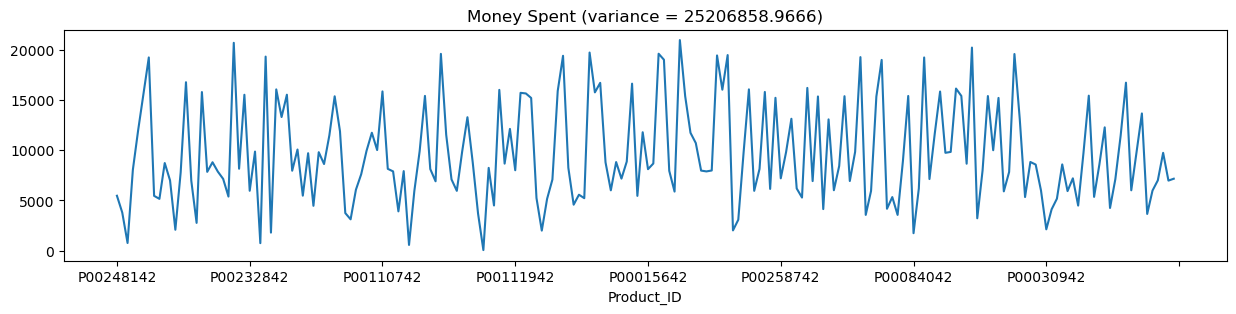

In [927]:
product = pd.read_csv(filename, header='infer')
product.index = product['Product_ID']
product = product['Purchase'].iloc[:200]

ax = product.plot(kind='line', figsize=(15,3))
ax.set_title('Money Spent (variance = %.4f)' % (product.var()))


# Sampling

In [928]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1005685,P00248142,M,26-35,17,A,0,1,5,NaN,NaN,5454
1,1003841,P00313742,M,46-50,18,A,4+,0,18,NaN,NaN,3786
2,1000631,P00173042,M,36-45,17,C,3,1,13,15.0,16.0,754
3,1004141,P00296042,M,36-45,17,B,2,0,8,13.0,16.0,8044
4,1003080,P00129842,M,26-35,20,A,4+,1,6,8.0,15.0,11996


In [929]:
sample = data.sample(n=3)
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
57754,1002305,P00074342,M,51-55,20,A,1,1,5,NaN,NaN,1762
271810,1004016,P00232842,M,51-55,0,B,1,0,8,NaN,NaN,3939
47300,1002777,P00004242,M,18-25,4,B,2,0,1,6.0,8.0,7915


In [930]:
sample = df.sample(frac=0.01, random_state=1)
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,encoded_productid,encoded_gender,encoded_age,encoded_citycat
88725,1003380,P00205442,M,51-55,0,B,1,5,8.0,14.0,5179,328,1,5,1
38472,1001437,P00119642,M,51-55,3,C,0,1,2.0,8.0,19529,171,1,5,2
11004,1000436,P00110842,M,18-25,4,C,0,1,2.0,5.0,15228,146,1,1,2
18452,1000724,P00241642,M,51-55,13,B,1,1,2.0,11.0,19656,372,1,5,1
131022,1004808,P00127642,M,36-45,0,A,1,1,2.0,15.0,19524,181,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144971,1005376,P00278942,M,26-35,17,B,1,1,2.0,3.0,15738,412,1,2,1
44677,1001658,P00190042,F,36-45,6,B,0,3,4.0,5.0,5577,296,0,3,1
4964,1000195,P00116942,M,26-35,12,B,1,6,10.0,16.0,16021,164,1,2,1
50913,1001880,P00193642,M,36-45,0,B,1,2,3.0,4.0,13197,309,1,3,1


In [931]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
128037,1002444,P00370293,F,46-50,4,B,1,1,19,NaN,NaN,13
491755,1000279,P00085242,M,26-35,14,C,3,0,8,14.0,17.0,5946
470924,1004458,P00287542,F,26-35,4,B,1,0,8,NaN,NaN,8134
491263,1004033,P00029242,M,26-35,6,B,1,0,8,NaN,NaN,8090
371403,1001538,P00115642,M,26-35,3,C,2,0,8,14.0,NaN,8122
...,...,...,...,...,...,...,...,...,...,...,...,...
131192,1001170,P00323642,M,55+,3,A,2,1,8,NaN,NaN,10017
290247,1003448,P00240242,F,18-25,3,A,4+,0,1,15.0,16.0,4229
211875,1005148,P00303042,M,26-35,20,B,2,1,5,NaN,NaN,7137
365665,1001579,P00148642,M,26-35,0,A,0,0,6,10.0,13.0,15918


# Discretization

754      13
8044     34
11996    25
15614    45
19216    24
         ..
16793     1
1520      1
23321     1
7525      1
18846     1
Name: Purchase, Length: 13876, dtype: int64

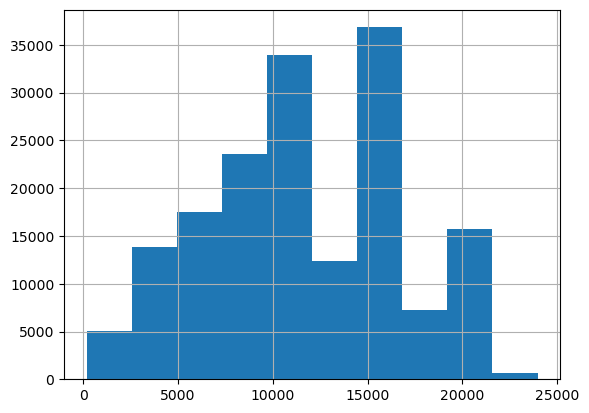

In [932]:
filename_read = os.path.join(path,'train.csv')
df = pd.read_csv(filename_read,na_values=['NaN','?'])
df = df.dropna()

df['Purchase'].hist(bins=10)
df['Purchase'].value_counts(sort=False)

In [933]:
bins = pd.cut(df['Purchase'],4)
bins.value_counts(sort=False)

(161.226, 6128.5]     26885
(6128.5, 12072.0]     67111
(12072.0, 18015.5]    49242
(18015.5, 23959.0]    23583
Name: Purchase, dtype: int64

# Principal Component Analysis

In [934]:
filename_read = os.path.join(path,'train.csv')
df = pd.read_csv(filename_read,na_values=['NaN','?'])
med = df['Product_Category_2'].median()
df['Product_Category_2'] = df['Product_Category_2'].fillna(med)

#df = df.dropna() # you can also simply drop NA values

med = df['Product_Category_3'].median()
df['Product_Category_3'] = df['Product_Category_3'].fillna(med)

def encode_text_dummy(df, Gender):
    dummies = pd.get_dummies(df[Gender], prefix=Gender)
    df = pd.concat([df, dummies], axis=1)
    df.drop([Gender] + dummies.columns[:-1].tolist(), axis=1, inplace=True)
    df.rename(columns={Gender+'_M': 'Gender'}, inplace=True)
    return df

df = encode_text_dummy(df, 'Gender')

features = ["Occupation", "Marital_Status",
            "Product_Category_1",	"Product_Category_2", "Product_Category_3",	
            "Purchase",	"Gender"]

df_sel = df[features]
df.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender
0,1005685,P00248142,26-35,17,A,0,1,5,9.0,14.0,5454,1
1,1003841,P00313742,46-50,18,A,4+,0,18,9.0,14.0,3786,1
2,1000631,P00173042,36-45,17,C,3,1,13,15.0,16.0,754,1
3,1004141,P00296042,36-45,17,B,2,0,8,13.0,16.0,8044,1
4,1003080,P00129842,26-35,20,A,4+,1,6,8.0,15.0,11996,1


In [935]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(df_sel)

projected = pca.transform(df_sel)
projected = pd.DataFrame(projected,columns=['pc1','pc2'])
projected["User_ID"] = df["User_ID"]
projected["City_Category"] = df["City_Category"]

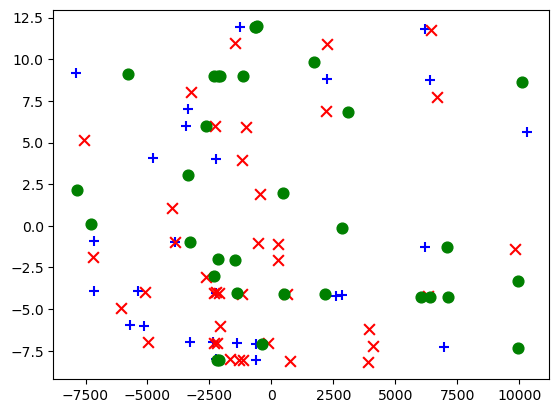

In [936]:
colors = {'A':'b', 'B':'r', 'C':'g', 'D':'k'}
markerTypes = {'A':'+', 'B':'x', 'C':'o', 'D':'s'}

projected_sample = projected.sample(100)

for city in markerTypes:
    d = projected_sample[projected_sample['City_Category']==city]
    plt.scatter(d['pc1'],d['pc2'], c=colors[city], s=60,marker=markerTypes[city])